In [1]:
#DATASET: Category: Engineering- Computers
#To predict relative performance of computer hardware
#model_name - Name of hardware model
#MYCT - machine cycle time in nanoseconds
#MMIN - minimum main memory in kilobytes
#MMAX - maximum main memory in kilobytes
#CACH - cache memory in kilobytes
#CHMIN - minimum channels in units
#CHMAX - maximum channels in units
#PRP - published relative performance
#ERP -Predictor Class: estimated relative performance from the original article


#DATA COLLECTION

import pandas as pd

In [2]:
data=pd.read_csv('computer_hardware.csv')

In [3]:
#DATA ANALYSIS

data.head()

,vendor_name,model_name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   vendor_name  209 non-null    object
 1   model_name   209 non-null    object
 2   MYCT         209 non-null    int64 
 3   MMIN         209 non-null    int64 
 4   MMAX         209 non-null    int64 
 5   CACH         209 non-null    int64 
 6   CHMIN        209 non-null    int64 
 7   CHMAX        209 non-null    int64 
 8   PRP          209 non-null    int64 
 9   ERP          209 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 16.5+ KB


In [5]:
#Checking if there are NaN values

data.isnull().sum()

vendor_name    0
model_name     0
MYCT           0
MMIN           0
MMAX           0
CACH           0
CHMIN          0
CHMAX          0
PRP            0
ERP            0
dtype: int64

In [8]:
data['vendor_name'].unique()

array(['adviser', 'amdahl', 'apollo', 'basf', 'bti', 'burroughs', 'c.r.d',
       'cdc', 'cambex', 'dec', 'dg', 'formation', 'four-phase', 'gould',
       'hp', 'harris', 'honeywell', 'ibm', 'ipl', 'magnuson', 'microdata',
       'nas', 'ncr', 'nixdorf', 'perkin-elmer', 'prime', 'siemens',
       'sperry', 'sratus', 'wang'], dtype=object)

In [24]:
#Vendor_name and model_name are not required so they are dropped.

X=data.drop(['vendor_name','model_name'],axis='columns')

In [25]:
X.head()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,125,256,6000,256,16,128,198,199
1,29,8000,32000,32,8,32,269,253
2,29,8000,32000,32,8,32,220,253
3,29,8000,32000,32,8,32,172,253
4,29,8000,16000,32,8,16,132,132


In [26]:
#Using Heatmap to see feature-feature correlation

import seaborn as sb

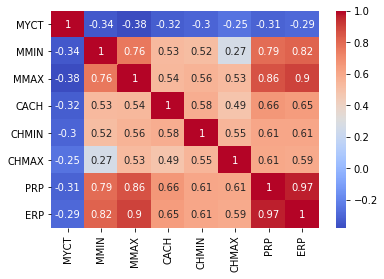

In [27]:
sb.heatmap(data.corr(),annot=True,cmap='coolwarm')

In [28]:
#DATA PROCESSING 
#Creating arrays

x=X.iloc[:,:-1].values

In [29]:
y=X.iloc[:,-1].values

In [32]:
#Splitting data into test vs train

from sklearn.model_selection import train_test_split as tts

In [33]:
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.2,random_state=30)

In [34]:
#ALGORITHM SELECTION

#Problem type is regression. Algorithm chosen: LINEAR REGRESRESSION.

from sklearn.linear_model import LinearRegression

In [35]:
linreg=LinearRegression()

In [36]:
linreg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
linacc=linreg.score(x_test,y_test)

In [38]:
linacc

0.9636948282286883

In [39]:
linpred=linreg.predict(x_test)

In [40]:
from matplotlib import pyplot as plt 

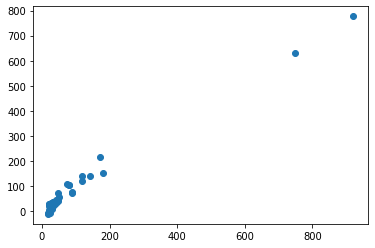

In [42]:
plt.scatter(y_test,linpred)

In [43]:
linacc

0.9636948282286883